## setup environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## prepare dataset

In [ ]:
import os

ZIP_PATH = '/content/drive/MyDrive/satellite_data.zip' # update
DATA_DIR = '/content/satellite_data'
METADATA_PATH = '/content/satellite_data/metadata.json' # update

if not os.path.exists(DATA_DIR):
    print("Unzipping dataset...")
    !unzip -q "{ZIP_PATH}" -d "{DATA_DIR}"
    print("Done.")
else:
    print("Dataset already unzipped.")

Unzipping dataset...
Done.


## install dependencies

In [ ]:
!pip install einops sympy

## training

In [ ]:
%load_ext tensorboard
%tensorboard --logdir ./logs

In [ ]:
BATCH_SIZE = 50
NUM_EPOCHS = 100
CLOUD_THRESHOLD = 20.0 # filter images with > 20% cloud coverage
IMAGE_SIZE = 64
DATA_PREPROCESS = "deluxe"

In [ ]:
!python train.py \
    --data_path "{DATA_DIR}" \
    --metadata_path "{METADATA_PATH}" \
    --batch_size {BATCH_SIZE} \
    --num_epochs {NUM_EPOCHS} \
    --cloud_threshold {CLOUD_THRESHOLD} \
    --image_size {IMAGE_SIZE} \
    --data_preprocess {DATA_PREPROCESS} \
    --checkpoint_dir ./checkpoints \
    --sample_dir ./logs \
    --conv_dim 64

## sampling
generate samples using the trained model.

In [ ]:
!python sample.py \
    --checkpoint_file diffusion_60.pth \
    --sample_dir ./generated_samples_60_ddim_gif \
    --num_samples 5 \
    --conv_dim 64 \
    --batch_size 5 \
    --image_size {IMAGE_SIZE} \
    --sampling_method ddim \
    --eta 0.0 \
    --save_gif

## visualize samples

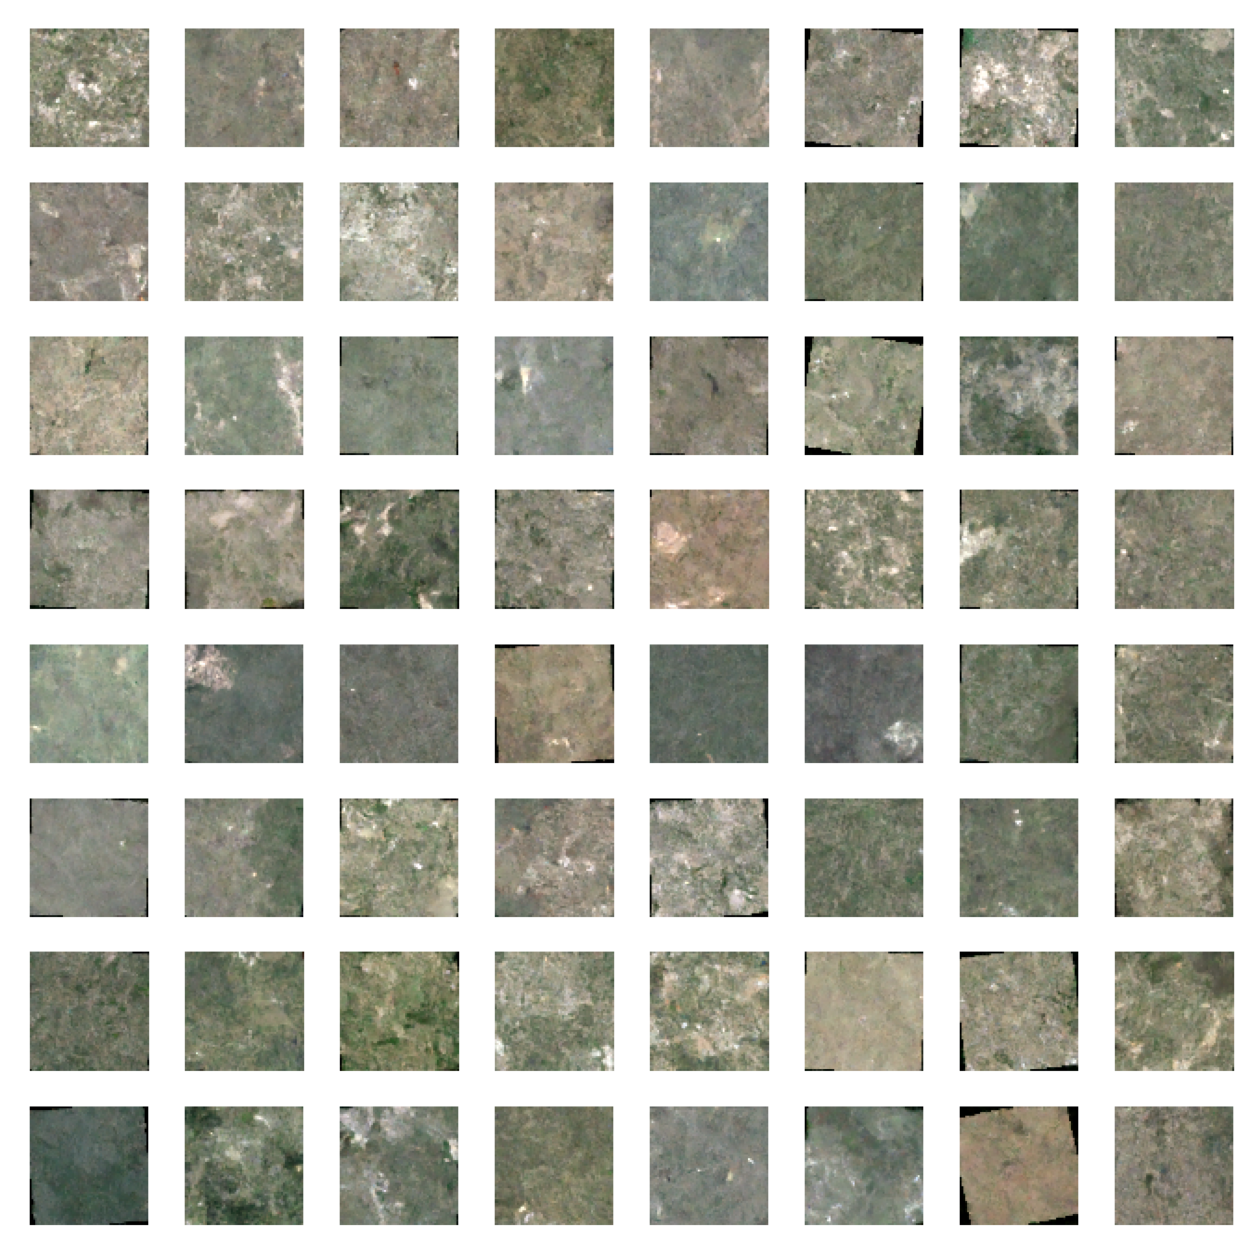

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample_images = glob.glob('./generated_samples_60_x64/*.png')

cols = 8
num_images = 64
subset_images = sample_images[:num_images]

rows = (len(subset_images) + cols - 1) // cols

plt.figure(figsize=(16, 2 * rows))

for i, img_path in enumerate(subset_images):
    img = mpimg.imread(img_path)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()